# **Bilan année 2022 des morts de moins de 18 ans dans les bases de données Eudravigilance**

**Objectif** :
Analyser les chiffres de l'organisme de pharmacovigilance européen Eudravigilance afin de faire la somme du nombre de personnes de moins de 18 ans ayant été supprimées de la base et le nombre de personnes ayant été rajoutées. Puis comparer ces données avec le nombre de doses pour 100 000 habitants injectés.

**Sources** : 

Base de données européenne des rapports sur les effets indésirables suspectés des médicaments :
https://www.adrreports.eu/

Covid-19 Vaccine Tracker :
https://vaccinetracker.ecdc.europa.eu/public/extensions/COVID-19/vaccine-tracker.html#distribution-tab

## **Dépendances**

In [1]:
from IPython.display import Markdown as md
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

import csv

## **Variables**

In [2]:
year = "2022"
dates = ['14 janvier', '1er fevrier', '14 fevrier', '1er mars', '14 mars', '1er avril', '14 avril', '1er mai', '14 mai', '1er juin', '14 juin', '1er juillet', '14 juillet', '1er aout', '15 aout', '1er septembre', '14 septembre', '1er octobre', '14 octobre', '1er novembre', '14 novembre','1er decembre', '14 decembre', '31 decembre']
dates_english = ['january 14th', 'february 1st', 'february 14th', 'march 1st', 'march 14th', 'april 1st', 'april 14th', 'may 1st', 'may 1st', 'june 1st', 'june 14th', 'july 1st', 'july 14th', 'august 1st', 'august 15th', 'september 1st', 'september 14th', 'october 1st', 'october 14th', 'november 1st', 'november 14th', 'december 1st', 'december 14th', 'december 31th']
logs = []

In [3]:
list_dates = []
list_months = []

list_dates.append('14')
list_months.append('janvier')

list_dates.append('1er')
list_months.append('fevrier')

list_dates.append('14')
list_months.append('fevrier')

list_dates.append('1er')
list_months.append('mars')

list_dates.append('14')
list_months.append('mars')

list_dates.append('1er')
list_months.append('avril')

list_dates.append('14')
list_months.append('avril')

list_dates.append('1er')
list_months.append('mai')

list_dates.append('14')
list_months.append('mai')

list_dates.append('1er')
list_months.append('juin')

list_dates.append('14')
list_months.append('juin')

list_dates.append('1er')
list_months.append('juillet')

list_dates.append('14')
list_months.append('juillet')

list_dates.append('1er')
list_months.append('aout')

list_dates.append('15')
list_months.append('aout')

list_dates.append('1er')
list_months.append('septembre')

list_dates.append('14')
list_months.append('septembre')

list_dates.append('1er')
list_months.append('octobre')

list_dates.append('14')
list_months.append('octobre')

list_dates.append('1er')
list_months.append('novembre')

list_dates.append('14')
list_months.append('novembre')

list_dates.append('1er')
list_months.append('decembre')

list_dates.append('14')
list_months.append('decembre')

list_dates.append('31')
list_months.append('decembre')

## **Fonctions**

In [4]:
def calc_delta(date_before, month_before, date_after, month_after, year, vaccine_type):

  data_before = pd.read_csv('../'+ month_before + year + '/adrreports_' + vaccine_type + '_'+ date_before +'_'+ month_before + '_' + year + '.csv', delimiter=',')
  data_after = pd.read_csv('../'+ month_after + year + '/adrreports_' + vaccine_type + '_' + date_after + '_'+ month_after +'_' + year + '.csv', delimiter=',')

  data_after = data_after[data_after['Reaction List PT (Duration – Outcome - Seriousness Criteria)'].notnull()]
  data_death_after = data_after[data_after['Reaction List PT (Duration – Outcome - Seriousness Criteria)'].str.contains('Death')]
  data_before = data_before[data_before['Reaction List PT (Duration – Outcome - Seriousness Criteria)'].notnull()]
  data_death_before = data_before[data_before['Reaction List PT (Duration – Outcome - Seriousness Criteria)'].str.contains('Death')]

  data_death_less_18_years_after = data_death_after[data_death_after['Patient Age Group'].str.contains('0-1 Month')
                                                    | data_death_after['Patient Age Group'].str.contains('2 Months - 2 Years')
                                                    | data_death_after['Patient Age Group'].str.contains('3-11 Years')
                                                    | data_death_after['Patient Age Group'].str.contains('12-17 Years')]
  data_death_less_18_years_before = data_death_before[data_death_before['Patient Age Group'].str.contains('0-1 Month')
                                                    | data_death_before['Patient Age Group'].str.contains('2 Months - 2 Years')
                                                    | data_death_before['Patient Age Group'].str.contains('3-11 Years')
                                                    | data_death_before['Patient Age Group'].str.contains('12-17 Years')]

  df_before = pd.DataFrame(data_death_less_18_years_before.iloc[:,0])
  df_after = pd.DataFrame(data_death_less_18_years_after.iloc[:,0])

  try:
    df_diff_common = df_before.merge(df_after, how = 'inner' ,indicator=False)
  except Exception as e:
      print(e)

  df_deleted = data_death_less_18_years_before[:]
  df_deleted = df_deleted.reset_index()

  list_index = []
  common_identifiers = df_diff_common.iloc[:,0].tolist()
  for i in df_deleted.index:
    if df_deleted.iloc[i,1] in common_identifiers:
      list_index.append(i)

  df_deleted.drop(list_index, inplace = True)

  df_added = data_death_less_18_years_after[:]
  df_added = df_added.reset_index()

  list_index = []
  common_identifiers = df_diff_common.iloc[:,0].tolist()
  for i in df_added.index:
    if df_added.iloc[i,1] in common_identifiers:
      list_index.append(i)

  df_added.drop(list_index, inplace = True)

  return len(data_death_less_18_years_before), len(data_death_less_18_years_after), len(df_deleted), len(df_added)

## *I - Données Eudravigilance*

### *Ia - Données Pfizer*

In [5]:
vaccine = "Pfizer"

In [6]:
list_delta_del = [0 for i in range(len(list_dates))]
list_delta_add = [0 for i in range(len(list_dates))]
list_deaths = [0 for i in range(len(list_dates))]
for date in range(len(list_dates)-1):
    nb_death_Pfizer_before, nb_death_Pfizer_after, nb_Pfizer_deleted, nb_Pfizer_added = calc_delta(list_dates[date], list_months[date], list_dates[date+1], list_months[date+1], year, 'PFIZER-BIONTECH_TOZINAMERAN')
    list_deaths[date] = nb_death_Pfizer_before
    list_deaths[date+1] = nb_death_Pfizer_after
    list_delta_add[date+1] = nb_Pfizer_added
    list_delta_del[date+1] = nb_Pfizer_deleted
    print(nb_death_Pfizer_before, nb_death_Pfizer_after, nb_Pfizer_deleted, nb_Pfizer_added)

list_cumul = [0 for i in range(len(list_dates))]
list_cumul[0] = list_deaths[0]
for date in range(len(list_dates)-1):
    list_cumul[date+1] = list_cumul[date] + list_delta_del[date+1] + list_delta_add[date+1]
logs.append(
    {
        "vaccine":vaccine,
        "official_deaths":list_deaths[-1],
        "total_deaths":list_cumul[-1]
    }
)

10 21 2 13
21 29 0 8
29 33 1 5
33 31 2 0
31 46 1 16
46 52 3 9
52 62 10 20
62 66 5 9
66 70 4 8
70 68 4 2
68 67 8 7
67 66 6 5
66 76 9 19
76 77 7 8
77 76 6 5
76 65 18 7


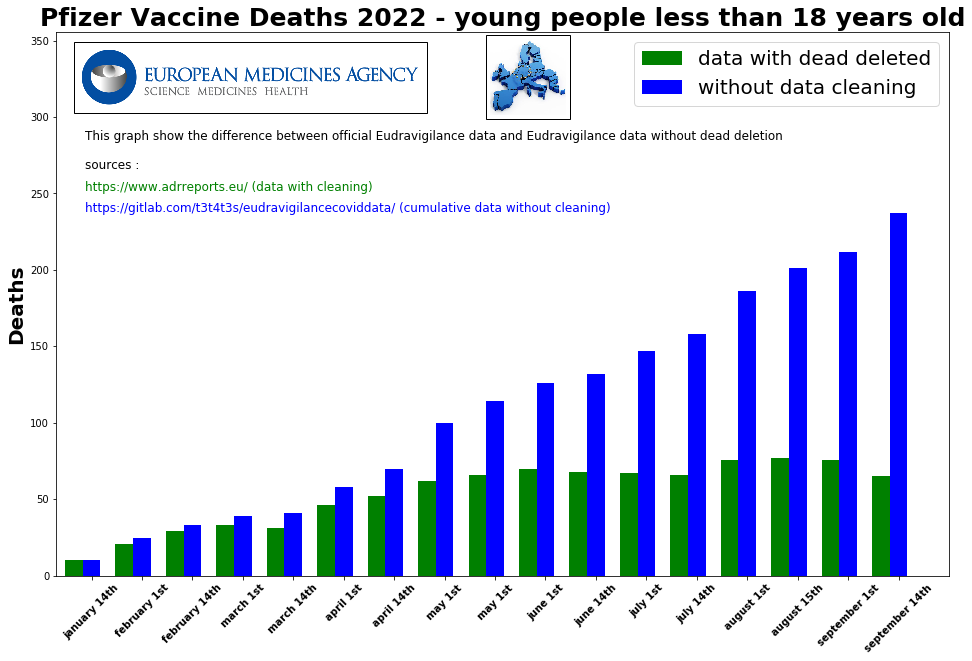

In [7]:
fig = plt.figure(figsize=(16,10),facecolor='white')
ax = fig.subplots()

## the data
N = len(dates)

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.35                      # the width of the bars

## the bars
rects1 = ax.bar(ind, list_deaths, width, color='green')
rects2 = ax.bar(ind+width, list_cumul, width, color='blue')

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,max(list_cumul)*1.5)
ax.set_ylabel('Deaths',fontweight ='bold', fontsize = 20)
ax.set_title(vaccine + ' Vaccine Deaths ' + year + ' - young people less than 18 years old',fontweight ='bold', fontsize = 25)
xTickMarks = dates_english
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontweight ='bold', fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('data with dead deleted', 'without data cleaning'), fontsize = 20 )

fig.text(0.15, 0.73,
         'This graph show the difference between official Eudravigilance data and Eudravigilance data without dead deletion', 
         fontsize = 12,
         color = "black")

fig.text(0.15, 0.69, 
         'sources :', 
         fontsize = 12,
         color = "black")

fig.text(0.15, 0.66,
         'https://www.adrreports.eu/ (data with cleaning)',
         fontsize = 12,
         color = "green")

fig.text(0.15, 0.63,
         'https://gitlab.com/t3t4t3s/eudravigilancecoviddata/ (cumulative data without cleaning)', 
         fontsize = 12,
         color = "blue")

arr_logo = mpimg.imread('logo_EMA.png')
imagebox1 = OffsetImage(arr_logo, zoom=0.5)
ab1 = AnnotationBbox(imagebox1, (3.5, max(list_cumul)*1.375))
ax.add_artist(ab1)

arr_EEE = mpimg.imread('carte_EEE.jpg')
imagebox2 = OffsetImage(arr_EEE, zoom=0.2)
ab2 = AnnotationBbox(imagebox2, (9, max(list_cumul)*1.375))
ax.add_artist(ab2)

fig.savefig("../resultats/" + year + "/less_18_years/" + vaccine + "_cumulative_covid_vaccine_deaths_Europe_" + year + "_less_18_years.png")

plt.show()


### *Ib - Données Moderna*

In [8]:
vaccine = "Moderna"

In [9]:
list_delta_del = [0 for i in range(len(list_dates))]
list_delta_add = [0 for i in range(len(list_dates))]
list_deaths = [0 for i in range(len(list_dates))]
for date in range(len(list_dates)-1):
    nb_death_Moderna_before, nb_death_Moderna_after, nb_Moderna_deleted, nb_Moderna_added = calc_delta(list_dates[date], list_months[date], list_dates[date+1], list_months[date+1], year, 'MODERNA_CX-024414')
    list_deaths[date] = nb_death_Moderna_before
    list_deaths[date+1] = nb_death_Moderna_after
    list_delta_add[date+1] = nb_Moderna_added
    list_delta_del[date+1] = nb_Moderna_deleted
    print(nb_death_Moderna_before, nb_death_Moderna_after, nb_Moderna_deleted, nb_Moderna_added)

list_cumul = [0 for i in range(len(list_dates))]
list_cumul[0] = list_deaths[0]
for date in range(len(list_dates)-1):
    list_cumul[date+1] = list_cumul[date] + list_delta_del[date+1] + list_delta_add[date+1]
logs.append(
    {
        "vaccine":vaccine,
        "official_deaths":list_deaths[-1],
        "total_deaths":list_cumul[-1]
    }
)

1 4 0 3
4 5 0 1
5 6 0 1
6 6 0 0
6 10 0 4
10 10 0 0
10 11 0 1
11 11 1 1
11 12 0 1
12 13 0 1
13 13 1 1
13 13 0 0
13 20 1 8
20 20 2 2
20 20 0 0
20 20 0 0


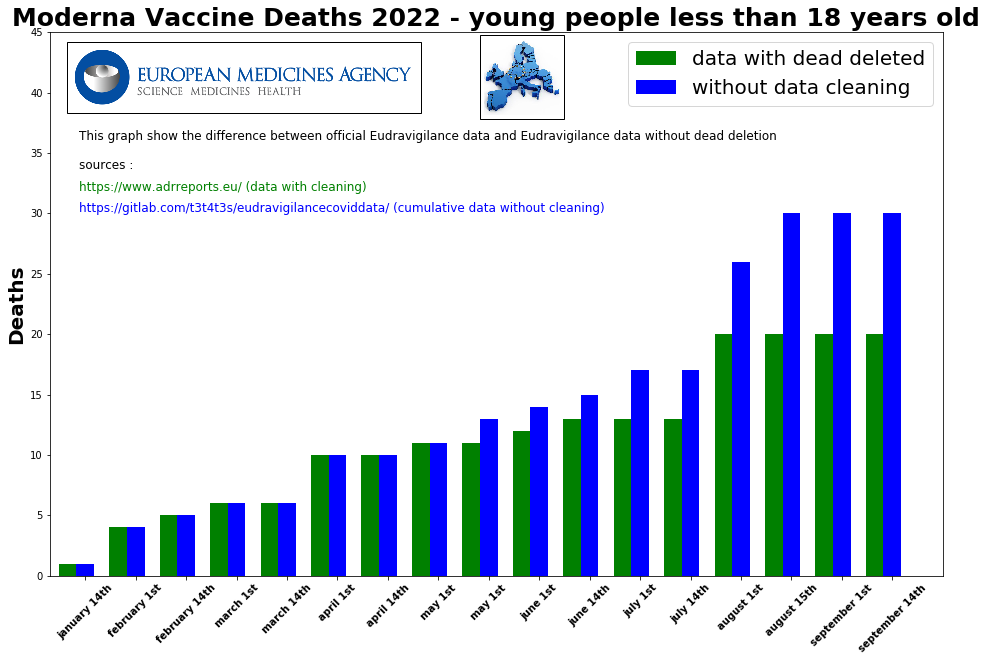

In [10]:
fig = plt.figure(figsize=(16,10),facecolor='white')
ax = fig.subplots()

## the data
N = len(dates)

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.35                      # the width of the bars

## the bars
rects1 = ax.bar(ind, list_deaths, width, color='green')
rects2 = ax.bar(ind+width, list_cumul, width, color='blue')

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,max(list_cumul)*1.5)
ax.set_ylabel('Deaths',fontweight ='bold', fontsize = 20)
ax.set_title(vaccine + ' Vaccine Deaths ' + year + ' - young people less than 18 years old',fontweight ='bold', fontsize = 25)
xTickMarks = dates_english
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontweight ='bold', fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('data with dead deleted', 'without data cleaning'), fontsize = 20 )

fig.text(0.15, 0.73,
         'This graph show the difference between official Eudravigilance data and Eudravigilance data without dead deletion', 
         fontsize = 12,
         color = "black")

fig.text(0.15, 0.69, 
         'sources :', 
         fontsize = 12,
         color = "black")

fig.text(0.15, 0.66,
         'https://www.adrreports.eu/ (data with cleaning)',
         fontsize = 12,
         color = "green")

fig.text(0.15, 0.63,
         'https://gitlab.com/t3t4t3s/eudravigilancecoviddata/ (cumulative data without cleaning)', 
         fontsize = 12,
         color = "blue")

arr_logo = mpimg.imread('logo_EMA.png')
imagebox1 = OffsetImage(arr_logo, zoom=0.5)
ab1 = AnnotationBbox(imagebox1, (3.5, max(list_cumul)*1.375))
ax.add_artist(ab1)

arr_EEE = mpimg.imread('carte_EEE.jpg')
imagebox2 = OffsetImage(arr_EEE, zoom=0.2)
ab2 = AnnotationBbox(imagebox2, (9, max(list_cumul)*1.375))
ax.add_artist(ab2)

fig.savefig("../resultats/" + year + "/less_18_years/" + vaccine + "_cumulative_covid_vaccine_deaths_Europe_" + year + "_less_18_years.png")

plt.show()


### *Ic - Données Astrazeneca*

In [11]:
vaccine = "Astrazeneca"

In [12]:
list_delta_del = [0 for i in range(len(list_dates))]
list_delta_add = [0 for i in range(len(list_dates))]
list_deaths = [0 for i in range(len(list_dates))]
for date in range(len(list_dates)-1):
    nb_death_Astrazeneca_before, nb_death_Astrazeneca_after, nb_Astrazeneca_deleted, nb_Astrazeneca_added = calc_delta(list_dates[date], list_months[date], list_dates[date+1], list_months[date+1], year, 'ASTRAZENECA_CHADOX1-NCOV-19')
    list_deaths[date] = nb_death_Astrazeneca_before
    list_deaths[date+1] = nb_death_Astrazeneca_after
    list_delta_add[date+1] = nb_Astrazeneca_added
    list_delta_del[date+1] = nb_Astrazeneca_deleted
    print(nb_death_Astrazeneca_before, nb_death_Astrazeneca_after, nb_Astrazeneca_deleted, nb_Astrazeneca_added)

list_cumul = [0 for i in range(len(list_dates))]
list_cumul[0] = list_deaths[0]
for date in range(len(list_dates)-1):
    list_cumul[date+1] = list_cumul[date] + list_delta_del[date+1] + list_delta_add[date+1]
logs.append(
    {
        "vaccine":vaccine,
        "official_deaths":list_deaths[-1],
        "total_deaths":list_cumul[-1]
    }
)

1 2 0 1
2 2 0 0
2 2 0 0
2 2 0 0
2 3 0 1
3 3 0 0
3 5 0 2
5 5 0 0
5 5 0 0
5 5 0 0
5 5 0 0
5 5 0 0
5 5 0 0
5 5 0 0
5 5 0 0
5 5 0 0


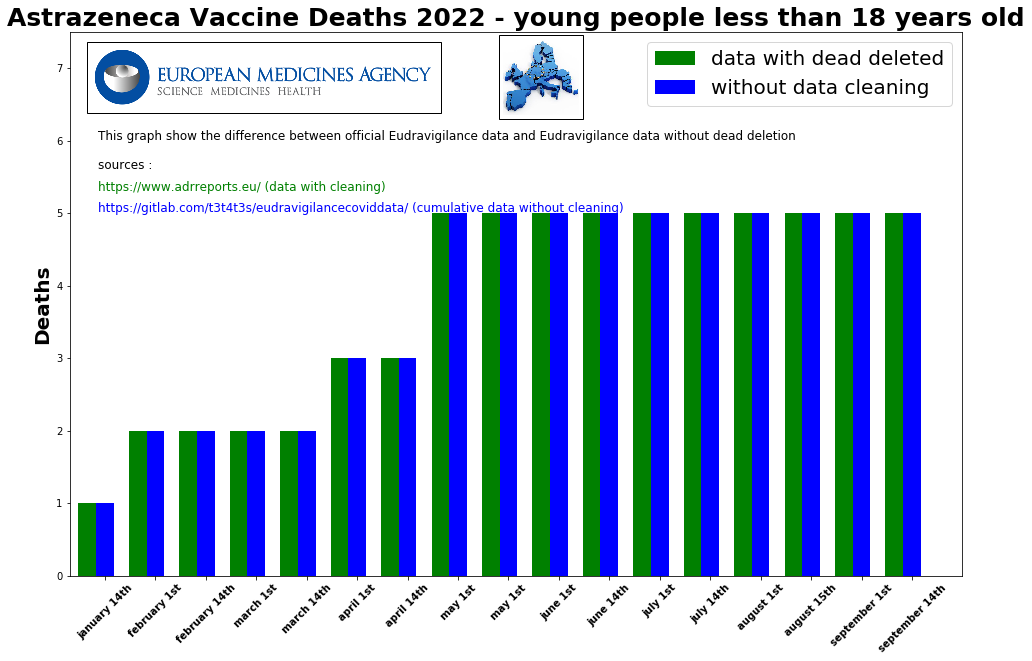

In [13]:
fig = plt.figure(figsize=(16,10),facecolor='white')
ax = fig.subplots()

## the data
N = len(dates)

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.35                      # the width of the bars

## the bars
rects1 = ax.bar(ind, list_deaths, width, color='green')
rects2 = ax.bar(ind+width, list_cumul, width, color='blue')

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,max(list_cumul)*1.5)
ax.set_ylabel('Deaths',fontweight ='bold', fontsize = 20)
ax.set_title(vaccine + ' Vaccine Deaths ' + year + ' - young people less than 18 years old',fontweight ='bold', fontsize = 25)
xTickMarks = dates_english
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontweight ='bold', fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('data with dead deleted', 'without data cleaning'), fontsize = 20 )

fig.text(0.15, 0.73,
         'This graph show the difference between official Eudravigilance data and Eudravigilance data without dead deletion', 
         fontsize = 12,
         color = "black")

fig.text(0.15, 0.69, 
         'sources :', 
         fontsize = 12,
         color = "black")

fig.text(0.15, 0.66,
         'https://www.adrreports.eu/ (data with cleaning)',
         fontsize = 12,
         color = "green")

fig.text(0.15, 0.63,
         'https://gitlab.com/t3t4t3s/eudravigilancecoviddata/ (cumulative data without cleaning)', 
         fontsize = 12,
         color = "blue")

arr_logo = mpimg.imread('logo_EMA.png')
imagebox1 = OffsetImage(arr_logo, zoom=0.5)
ab1 = AnnotationBbox(imagebox1, (3.5, max(list_cumul)*1.375))
ax.add_artist(ab1)

arr_EEE = mpimg.imread('carte_EEE.jpg')
imagebox2 = OffsetImage(arr_EEE, zoom=0.2)
ab2 = AnnotationBbox(imagebox2, (9, max(list_cumul)*1.375))
ax.add_artist(ab2)

fig.savefig("../resultats/" + year + "/less_18_years/" + vaccine + "_cumulative_covid_vaccine_deaths_Europe_" + year + "_less_18_years.png")

plt.show()


### *Id - Données Janssen*

In [14]:
vaccine = "Janssen"

In [15]:
list_delta_del = [0 for i in range(len(list_dates))]
list_delta_add = [0 for i in range(len(list_dates))]
list_deaths = [0 for i in range(len(list_dates))]
for date in range(len(list_dates)-1):
    nb_death_Janssen_before, nb_death_Janssen_after, nb_Janssen_deleted, nb_Janssen_added = calc_delta(list_dates[date], list_months[date], list_dates[date+1], list_months[date+1], year, 'JANSSEN_AD26.COV2.S')
    list_deaths[date] = nb_death_Janssen_before
    list_deaths[date+1] = nb_death_Janssen_after
    list_delta_add[date+1] = nb_Janssen_added
    list_delta_del[date+1] = nb_Janssen_deleted
    print(nb_death_Janssen_before, nb_death_Janssen_after, nb_Janssen_deleted, nb_Janssen_added)

list_cumul = [0 for i in range(len(list_dates))]
list_cumul[0] = list_deaths[0]
for date in range(len(list_dates)-1):
    list_cumul[date+1] = list_cumul[date] + list_delta_del[date+1] + list_delta_add[date+1]
logs.append(
    {
        "vaccine":vaccine,
        "official_deaths":list_deaths[-1],
        "total_deaths":list_cumul[-1]
    }
)

0 2 0 2
2 2 0 0
2 2 0 0
2 2 0 0
2 3 0 1
3 3 0 0
3 4 1 2
4 4 0 0
4 4 0 0
4 5 0 1
5 5 0 0
5 5 0 0
5 6 0 1
6 6 0 0
6 6 0 0
6 4 2 0


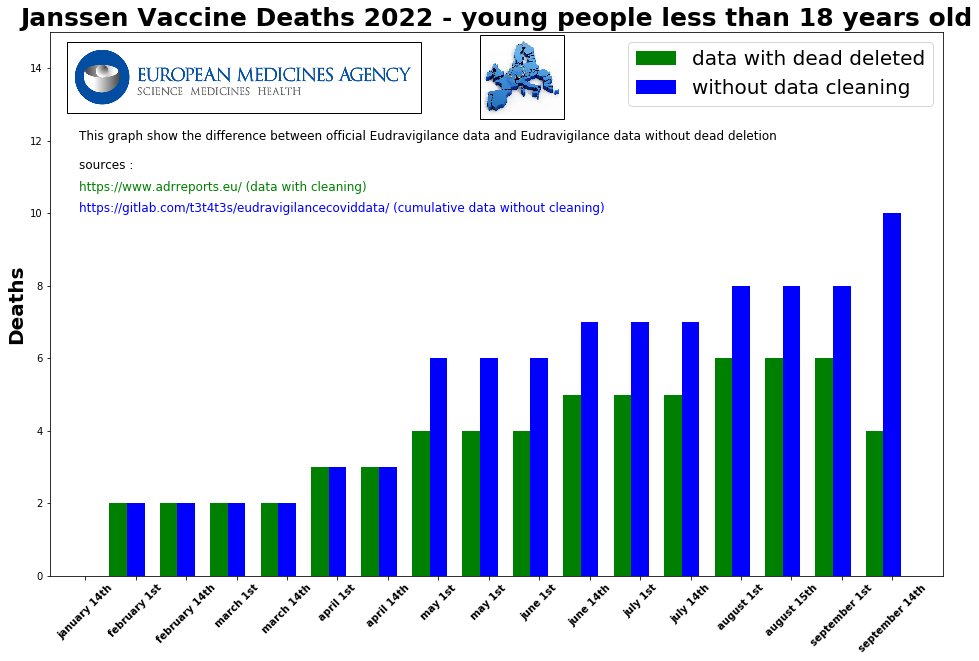

In [16]:
fig = plt.figure(figsize=(16,10),facecolor='white')
ax = fig.subplots()

## the data
N = len(dates)

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.35                      # the width of the bars

## the bars
rects1 = ax.bar(ind, list_deaths, width, color='green')
rects2 = ax.bar(ind+width, list_cumul, width, color='blue')

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,max(list_cumul)*1.5)
ax.set_ylabel('Deaths',fontweight ='bold', fontsize = 20)
ax.set_title(vaccine + ' Vaccine Deaths ' + year + ' - young people less than 18 years old',fontweight ='bold', fontsize = 25)
xTickMarks = dates_english
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontweight ='bold', fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('data with dead deleted', 'without data cleaning'), fontsize = 20 )

fig.text(0.15, 0.73,
         'This graph show the difference between official Eudravigilance data and Eudravigilance data without dead deletion', 
         fontsize = 12,
         color = "black")

fig.text(0.15, 0.69, 
         'sources :', 
         fontsize = 12,
         color = "black")

fig.text(0.15, 0.66,
         'https://www.adrreports.eu/ (data with cleaning)',
         fontsize = 12,
         color = "green")

fig.text(0.15, 0.63,
         'https://gitlab.com/t3t4t3s/eudravigilancecoviddata/ (cumulative data without cleaning)', 
         fontsize = 12,
         color = "blue")

arr_logo = mpimg.imread('logo_EMA.png')
imagebox1 = OffsetImage(arr_logo, zoom=0.5)
ab1 = AnnotationBbox(imagebox1, (3.5, max(list_cumul)*1.375))
ax.add_artist(ab1)

arr_EEE = mpimg.imread('carte_EEE.jpg')
imagebox2 = OffsetImage(arr_EEE, zoom=0.2)
ab2 = AnnotationBbox(imagebox2, (9, max(list_cumul)*1.375))
ax.add_artist(ab2)

fig.savefig("../resultats/" + year + "/less_18_years/" + vaccine + "_cumulative_covid_vaccine_deaths_Europe_" + year + "_less_18_years.png")

plt.show()


### *Ie - Données Novavax*

In [17]:
vaccine = "Novavax"

In [19]:
list_delta_del = [0 for i in range(len(list_dates))]
list_delta_add = [0 for i in range(len(list_dates))]
list_deaths = [0 for i in range(len(list_dates))]
for date in range(5,len(list_dates)-1):
    nb_death_Novavax_before, nb_death_Novavax_after, nb_Novavax_deleted, nb_Novavax_added = calc_delta(list_dates[date], list_months[date], list_dates[date+1], list_months[date+1], year, 'NOVAVAX_NVX-COV2373')
    list_deaths[date] = nb_death_Novavax_before
    list_deaths[date+1] = nb_death_Novavax_after
    list_delta_add[date+1] = nb_Novavax_added
    list_delta_del[date+1] = nb_Novavax_deleted
    print(nb_death_Novavax_before, nb_death_Novavax_after, nb_Novavax_deleted, nb_Novavax_added)

list_cumul = [0 for i in range(len(list_dates))]
list_cumul[0] = list_deaths[0]
for date in range(5,len(list_dates)-1):
    list_cumul[date+1] = list_cumul[date] + list_delta_del[date+1] + list_delta_add[date+1]
logs.append(
    {
        "vaccine":vaccine,
        "official_deaths":list_deaths[-1],
        "total_deaths":list_cumul[-1]
    }
)

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


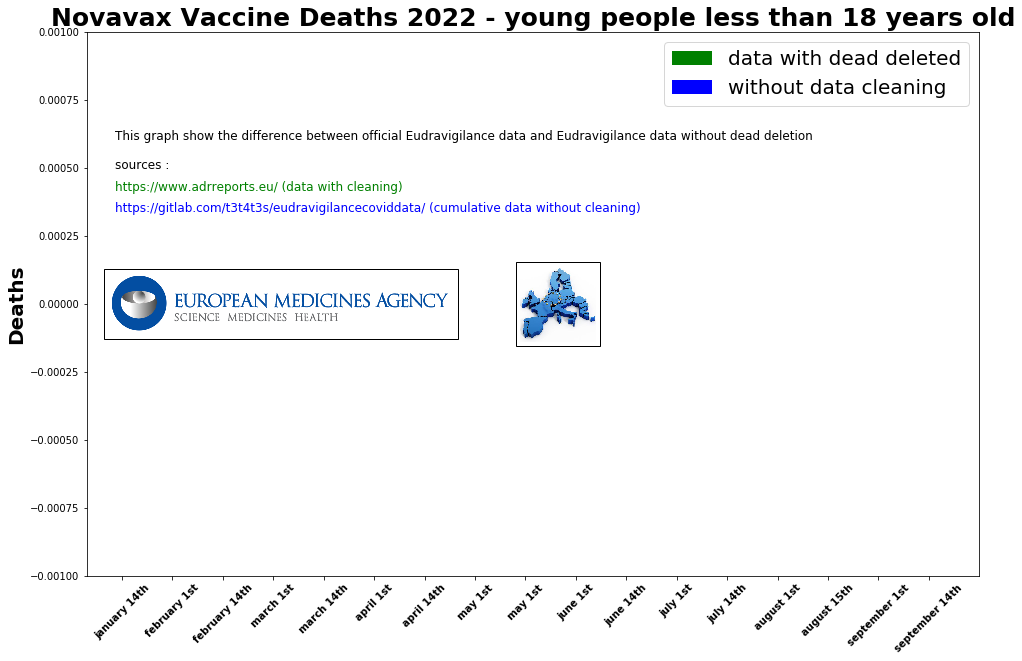

In [20]:
fig = plt.figure(figsize=(16,10),facecolor='white')
ax = fig.subplots()

## the data
N = len(dates)

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.35                      # the width of the bars

## the bars
rects1 = ax.bar(ind, list_deaths, width, color='green')
rects2 = ax.bar(ind+width, list_cumul, width, color='blue')

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,max(list_cumul)*1.5)
ax.set_ylabel('Deaths',fontweight ='bold', fontsize = 20)
ax.set_title(vaccine + ' Vaccine Deaths ' + year + ' - young people less than 18 years old',fontweight ='bold', fontsize = 25)
xTickMarks = dates_english
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontweight ='bold', fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('data with dead deleted', 'without data cleaning'), fontsize = 20 )

fig.text(0.15, 0.73,
         'This graph show the difference between official Eudravigilance data and Eudravigilance data without dead deletion', 
         fontsize = 12,
         color = "black")

fig.text(0.15, 0.69, 
         'sources :', 
         fontsize = 12,
         color = "black")

fig.text(0.15, 0.66,
         'https://www.adrreports.eu/ (data with cleaning)',
         fontsize = 12,
         color = "green")

fig.text(0.15, 0.63,
         'https://gitlab.com/t3t4t3s/eudravigilancecoviddata/ (cumulative data without cleaning)', 
         fontsize = 12,
         color = "blue")

arr_logo = mpimg.imread('logo_EMA.png')
imagebox1 = OffsetImage(arr_logo, zoom=0.5)
ab1 = AnnotationBbox(imagebox1, (3.5, max(list_cumul)*1.375))
ax.add_artist(ab1)

arr_EEE = mpimg.imread('carte_EEE.jpg')
imagebox2 = OffsetImage(arr_EEE, zoom=0.2)
ab2 = AnnotationBbox(imagebox2, (9, max(list_cumul)*1.375))
ax.add_artist(ab2)

fig.savefig("../resultats/" + year + "/less_18_years/" + vaccine + "_cumulative_covid_vaccine_deaths_Europe_" + year + "_less_18_years.png")

plt.show()


## *II - Sauvegarde des données*

In [21]:
# Configuration du fichier .csv de sauvegarde
exportFilename = "../resultats/" + year + "/less_18_years/covid_vaccine_deaths_" + year + "_less_18_years.csv"

# csv header
fieldnames = ['vaccine', 'official_deaths', 'total_deaths']

with open(exportFilename, 'w', encoding='UTF8', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(logs)